In [1]:
import numpy as np
import matplotlib
from scipy.stats import entropy
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [2]:
def ReBinImage(image, CurrentBins, NewBins):
    

    binfactor = CurrentBins/NewBins;
    row = image.shape[0]  
    col = image.shape[1]  

     
    newimage = image
    for i in range(row) :
        for j in range(col) :
            newimage[i][j] = math.ceil(newimage[i][j]/binfactor)


    return newimage


def Image2Entropy(InputImg, numBin, minval, maxval) :
        InputImgFlat = InputImg.flatten()
        InputImgFlatHisto = plt.hist(InputImgFlat, bins=numBin, range=(minval,maxval))

        #calculate entropy
        InputImgEntropy = 0
        for i in InputImgFlatHisto[0]:
            if i > 0:
                InputImgEntropy -= (i/sum(InputImgFlatHisto[0])) * math.log2(i/sum(InputImgFlatHisto[0]))
    
        return InputImgEntropy

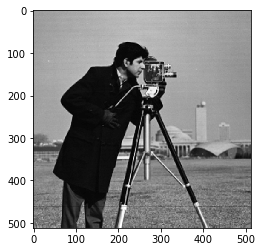

In [3]:
ImagePath = 'CameraMan.png' #'Lion.png' # 'CameraMan.png' #
Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
plt.show()

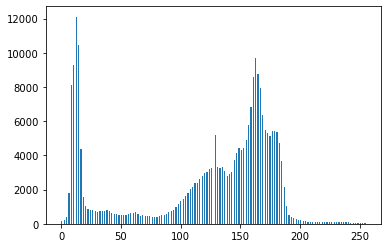

In [4]:
#the function for entropy will be used in the later section
#this is just for demo
#calculate histogram
Imgflat = Img.flatten()
ImgHisto = plt.hist(Imgflat, bins=256, range=(0,255))

In [5]:
#calculate entropy
ImgEntropy = 0
for i in ImgHisto[0]:
    if i > 0:
        ImgEntropy -= (i/sum(ImgHisto[0])) * math.log2(i/sum(ImgHisto[0]))
print (ImgEntropy)

6.049670834469638


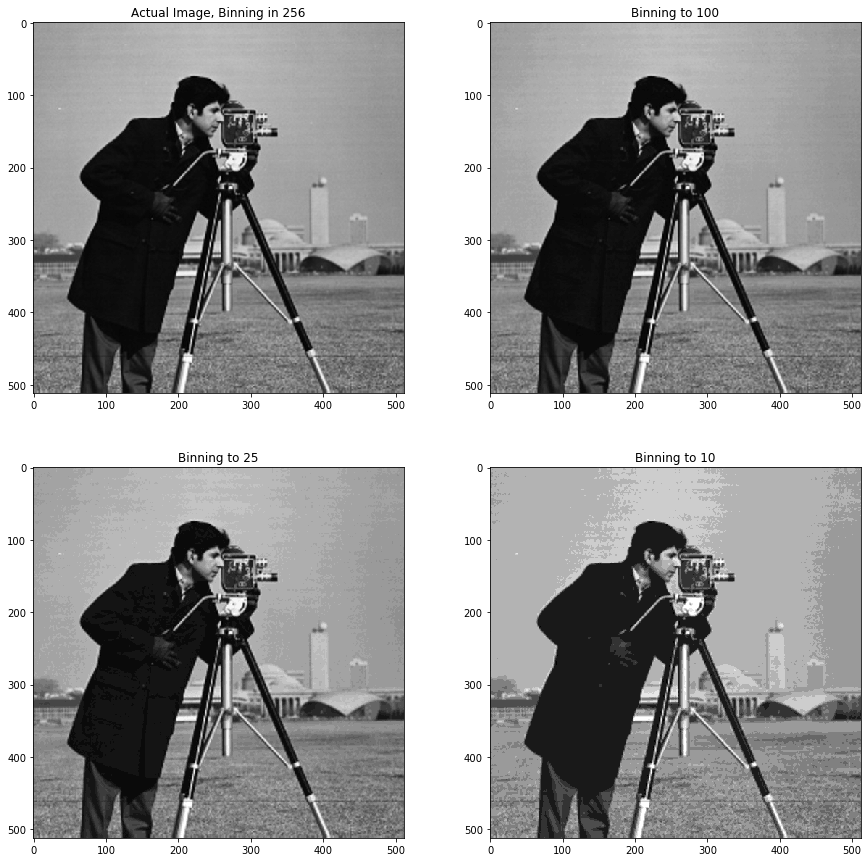

In [6]:
#remove high frequency component
#simple method is to group the different shades in to one
#these are high level details mostly unnoticed by human eye
#no the image has repetaion of data spatially
ActuaBin = 256

Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
NewBin1 = 100; #now there are only 128 posible shades
ImglossyReconstruct1 = ReBinImage(Img, ActuaBin, NewBin1)*(256/NewBin1) 
#this multiplication is to bring both the image in same intensity scale
#although the value now ranges from 0, 255 there are only 128 distict values in the image

Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
#do the same of smaller bin
NewBin2 = 25; #just to check the limits of this method
ImglossyReconstruct2 = ReBinImage(Img, ActuaBin, NewBin2)*(256/NewBin2) 

Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
#do the same of smaller bin
NewBin3 = 10; #just to check the limits of this method
ImglossyReconstruct3 = ReBinImage(Img, ActuaBin, NewBin3)*(256/NewBin3) 

Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(2,2, figsize=(15, 15))
ax[0][0].title.set_text('Actual Image, Binning in %d' %ActuaBin)
ax[0][1].title.set_text('Binning to %d' %NewBin1)
ax[1][0].title.set_text('Binning to %d' %NewBin2)
ax[1][1].title.set_text('Binning to %d' %NewBin3)

ax[0][0].imshow(Img, cmap='gray', vmin=0, vmax=255)
ax[0][1].imshow(ImglossyReconstruct1, cmap='gray', vmin=0, vmax=255)
ax[1][0].imshow(ImglossyReconstruct2, cmap='gray', vmin=0, vmax=255)
ax[1][1].imshow(ImglossyReconstruct3, cmap='gray', vmin=0, vmax=255)
plt.show()

[5.643795216352779, 3.858295280778831, 2.6045561811745817]


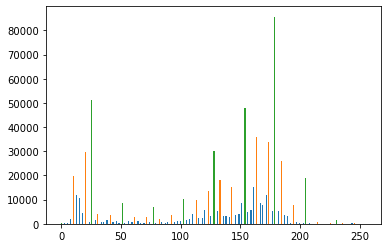

In [7]:
ImglossyReconstructEntropy1 = Image2Entropy(ImglossyReconstruct1, 256, 0, 255)
ImglossyReconstructEntropy2 = Image2Entropy(ImglossyReconstruct2, 256, 0, 255)
ImglossyReconstructEntropy3 = Image2Entropy(ImglossyReconstruct3, 256, 0, 255)

print ([ImglossyReconstructEntropy1, ImglossyReconstructEntropy2, ImglossyReconstructEntropy3] )#check if the entropy is reduced

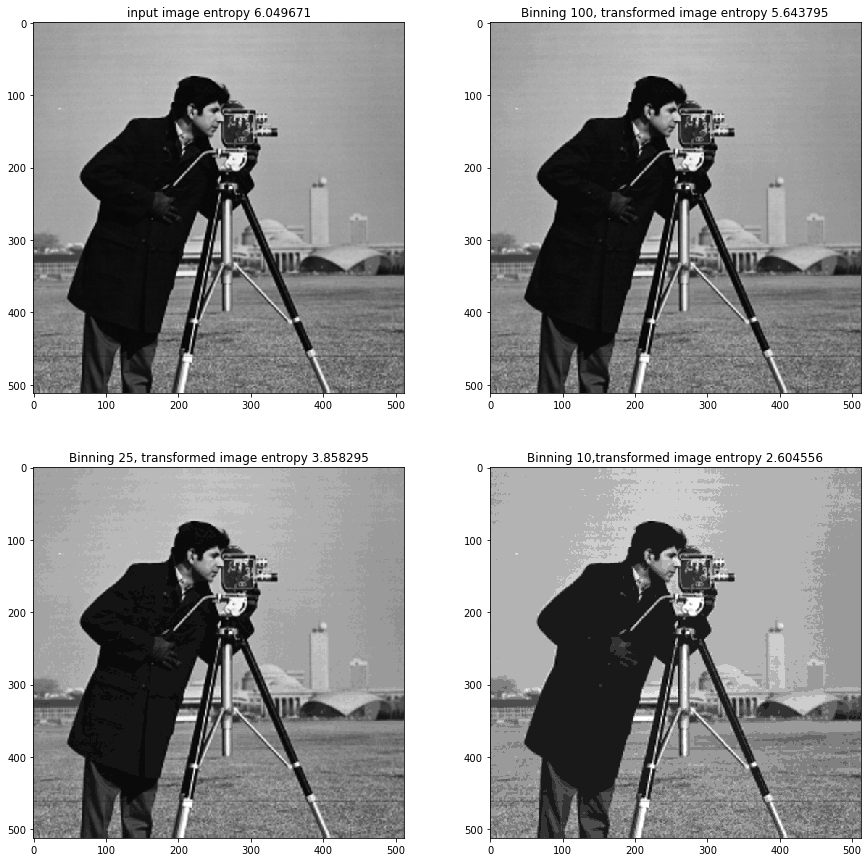

In [8]:
#see the input image and entroppy reduced image
Img = cv2.imread(ImagePath, cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(2,2, figsize=(15, 15))
ax[0][0].title.set_text('input image entropy %f' %ImgEntropy)
ax[0][1].title.set_text('Binning %d' %NewBin1  +', transformed image entropy %f' %ImglossyReconstructEntropy1)
ax[1][0].title.set_text('Binning %d' %NewBin2  +', transformed image entropy %f' %ImglossyReconstructEntropy2)
ax[1][1].title.set_text('Binning %d' %NewBin3  +',transformed image entropy %f' %ImglossyReconstructEntropy3)

ax[0][0].imshow(Img, cmap='gray', vmin=0, vmax=255);
ax[0][1].imshow(ImglossyReconstruct1, cmap='gray', vmin=0, vmax=255);
ax[1][0].imshow(ImglossyReconstruct2, cmap='gray', vmin=0, vmax=255);
ax[1][1].imshow(ImglossyReconstruct3, cmap='gray', vmin=0, vmax=255);

In [9]:
Img

array([[157, 157, 159, ..., 151, 151, 151],
       [155, 157, 157, ..., 151, 151, 151],
       [157, 157, 155, ..., 153, 151, 151],
       ...,
       [122, 120, 126, ..., 122, 114, 110],
       [120, 120, 129, ..., 124, 114, 108],
       [124, 120, 126, ..., 120, 112, 112]], dtype=uint8)

In [10]:
ImglossyReconstruct1

array([[158.72, 158.72, 161.28, ..., 151.04, 151.04, 151.04],
       [156.16, 158.72, 158.72, ..., 151.04, 151.04, 151.04],
       [158.72, 158.72, 156.16, ..., 153.6 , 151.04, 151.04],
       ...,
       [122.88, 120.32, 128.  , ..., 122.88, 115.2 , 110.08],
       [120.32, 120.32, 130.56, ..., 125.44, 115.2 , 110.08],
       [125.44, 120.32, 128.  , ..., 120.32, 112.64, 112.64]])

In [11]:
ImglossyReconstruct2

array([[163.84, 163.84, 163.84, ..., 153.6 , 153.6 , 153.6 ],
       [163.84, 163.84, 163.84, ..., 153.6 , 153.6 , 153.6 ],
       [163.84, 163.84, 163.84, ..., 153.6 , 153.6 , 153.6 ],
       ...,
       [122.88, 122.88, 133.12, ..., 122.88, 122.88, 112.64],
       [122.88, 122.88, 133.12, ..., 133.12, 122.88, 112.64],
       [133.12, 122.88, 133.12, ..., 122.88, 112.64, 112.64]])

In [12]:
ImglossyReconstruct3

array([[179.2, 179.2, 179.2, ..., 153.6, 153.6, 153.6],
       [179.2, 179.2, 179.2, ..., 153.6, 153.6, 153.6],
       [179.2, 179.2, 179.2, ..., 153.6, 153.6, 153.6],
       ...,
       [128. , 128. , 128. , ..., 128. , 128. , 128. ],
       [128. , 128. , 153.6, ..., 128. , 128. , 128. ],
       [128. , 128. , 128. , ..., 128. , 128. , 128. ]])